[*********************100%***********************]  1 of 1 completed


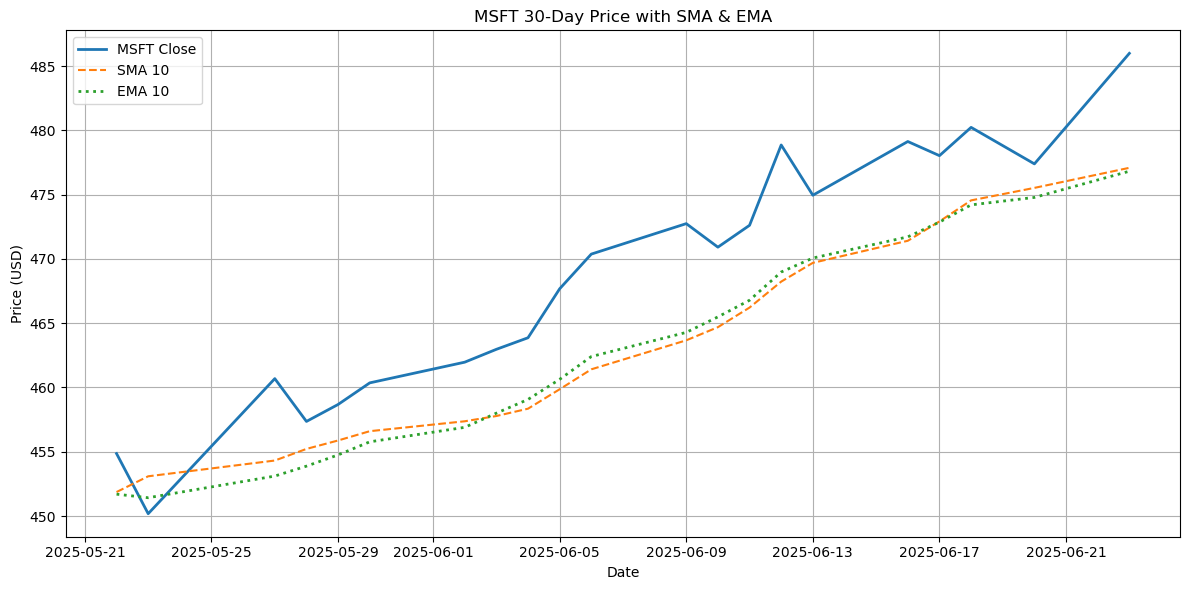

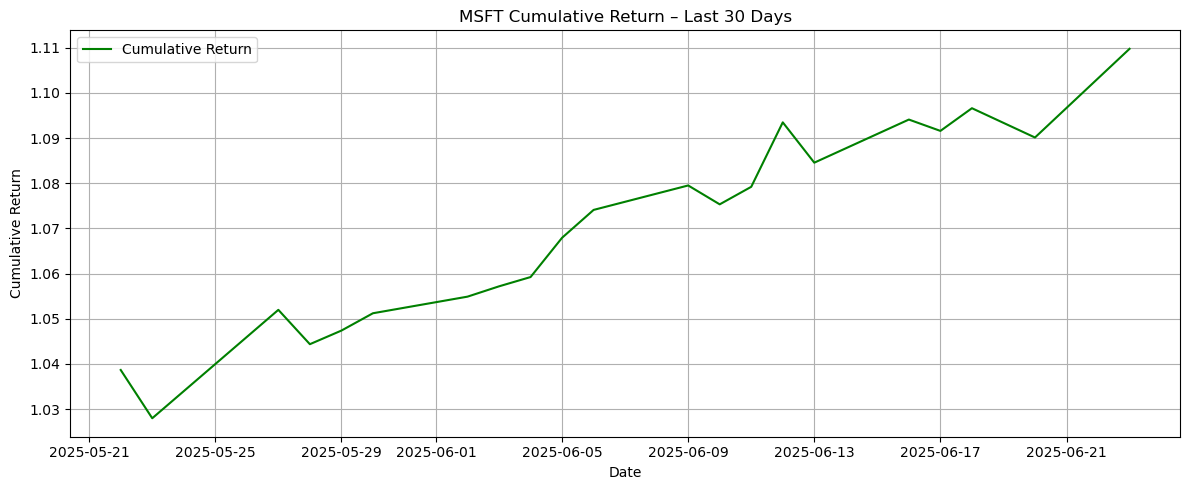

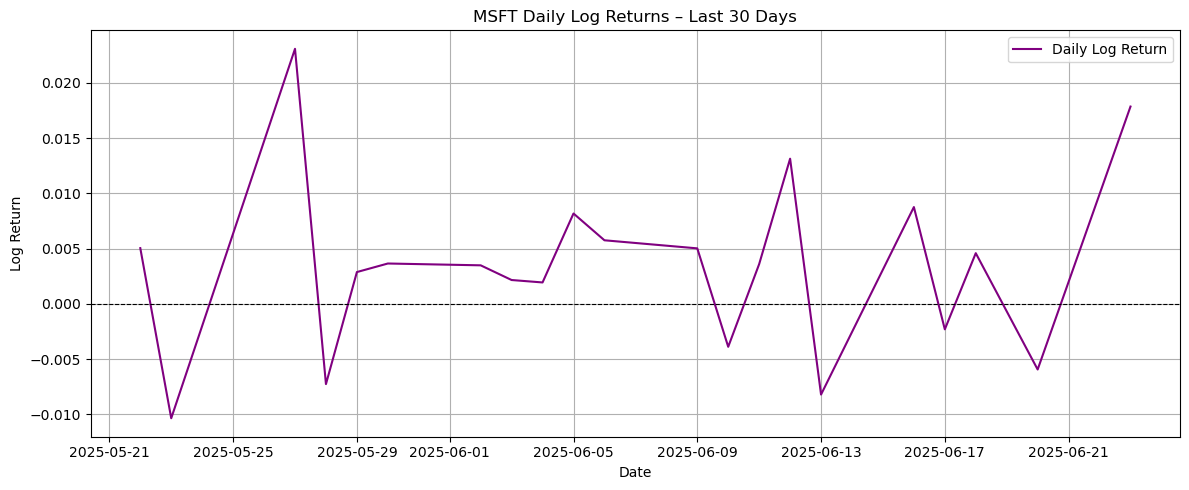

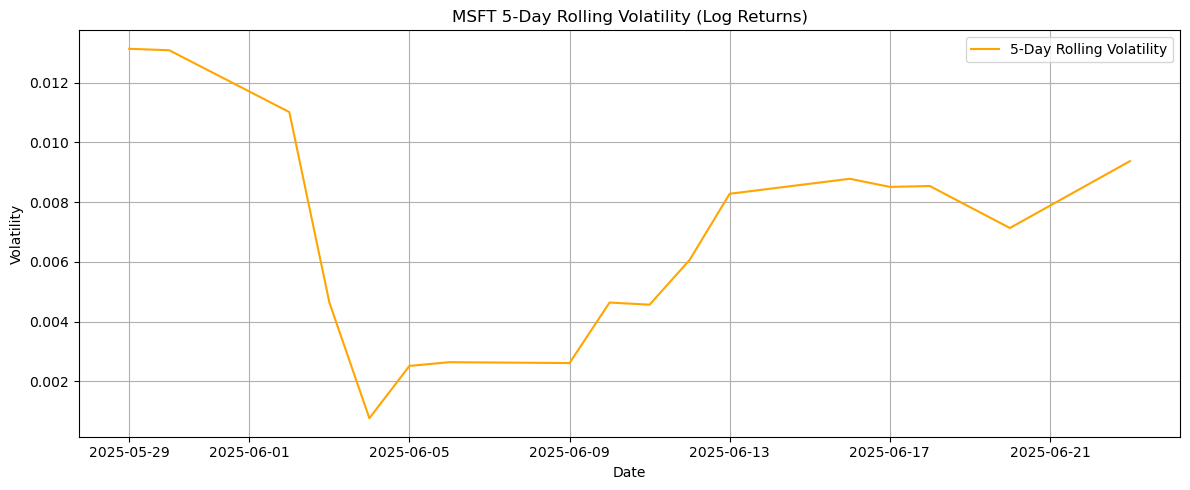

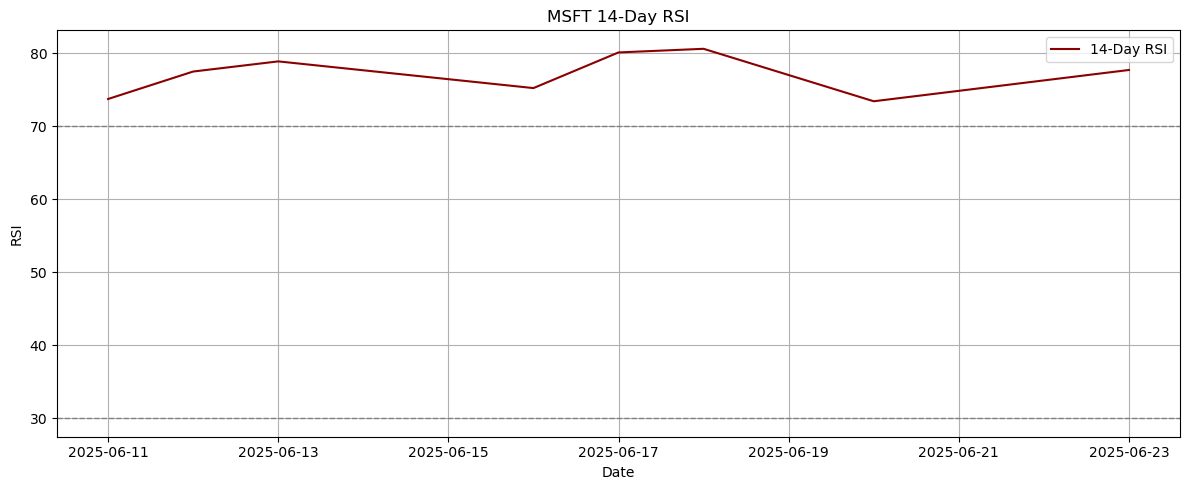

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download 30-day MSFT stock price data
ticker = 'MSFT'
data = yf.download(ticker, period='30d', auto_adjust=True)

# Compute 10-day SMA and EMA
data['SMA_10'] = data['Close'].rolling(window=10).mean()
data['EMA_10'] = data['Close'].ewm(span=10, adjust=False).mean()

# Compute cumulative return
data['Cumulative Return'] = data['Close'] / data['Close'].iloc[0]

# Compute daily log returns
data['Log Return'] = np.log(data['Close'] / data['Close'].shift(1))

# Drop NaN values for returns
data.dropna(inplace=True)

# Plot 1: Price + SMA + EMA
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='MSFT Close', linewidth=2)
plt.plot(data.index, data['SMA_10'], label='SMA 10', linestyle='--')
plt.plot(data.index, data['EMA_10'], label='EMA 10', linestyle=':', linewidth=2)
plt.title("MSFT 30-Day Price with SMA & EMA")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Cumulative Return
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['Cumulative Return'], label='Cumulative Return', color='green')
plt.title("MSFT Cumulative Return – Last 30 Days")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# Plot 3: Log Returns
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['Log Return'], label='Daily Log Return', color='purple')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.title("MSFT Daily Log Returns – Last 30 Days")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# Compute 5-day rolling volatility (standard deviation of log returns)
data['Volatility_5'] = data['Log Return'].rolling(window=5).std()

# Plot Volatility
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['Volatility_5'], label='5-Day Rolling Volatility', color='orange')
plt.title("MSFT 5-Day Rolling Volatility (Log Returns)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# Compute 14-day RSI
delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss
data['RSI_14'] = 100 - (100 / (1 + rs))

# Plot RSI
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['RSI_14'], label='14-Day RSI', color='darkred')
plt.axhline(70, color='gray', linestyle='--', linewidth=1)  # Overbought
plt.axhline(30, color='gray', linestyle='--', linewidth=1)  # Oversold
plt.title("MSFT 14-Day RSI")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()